# House Price Prediction Model

In [42]:
#impoting Modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Loading Dataset

In [43]:
dataset=pd.read_csv("housing.csv",)

In [44]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data PreProcessing

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
dataset.dropna(inplace=True)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Data Visualization

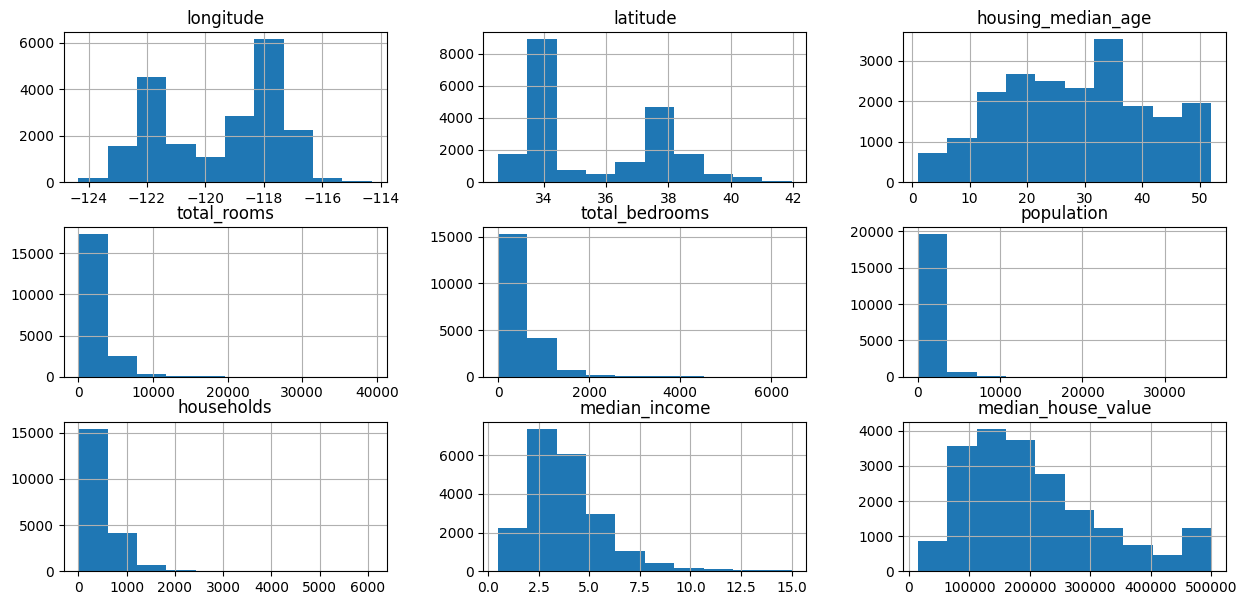

In [48]:
dataset.hist(figsize=(15,7))
plt.show()

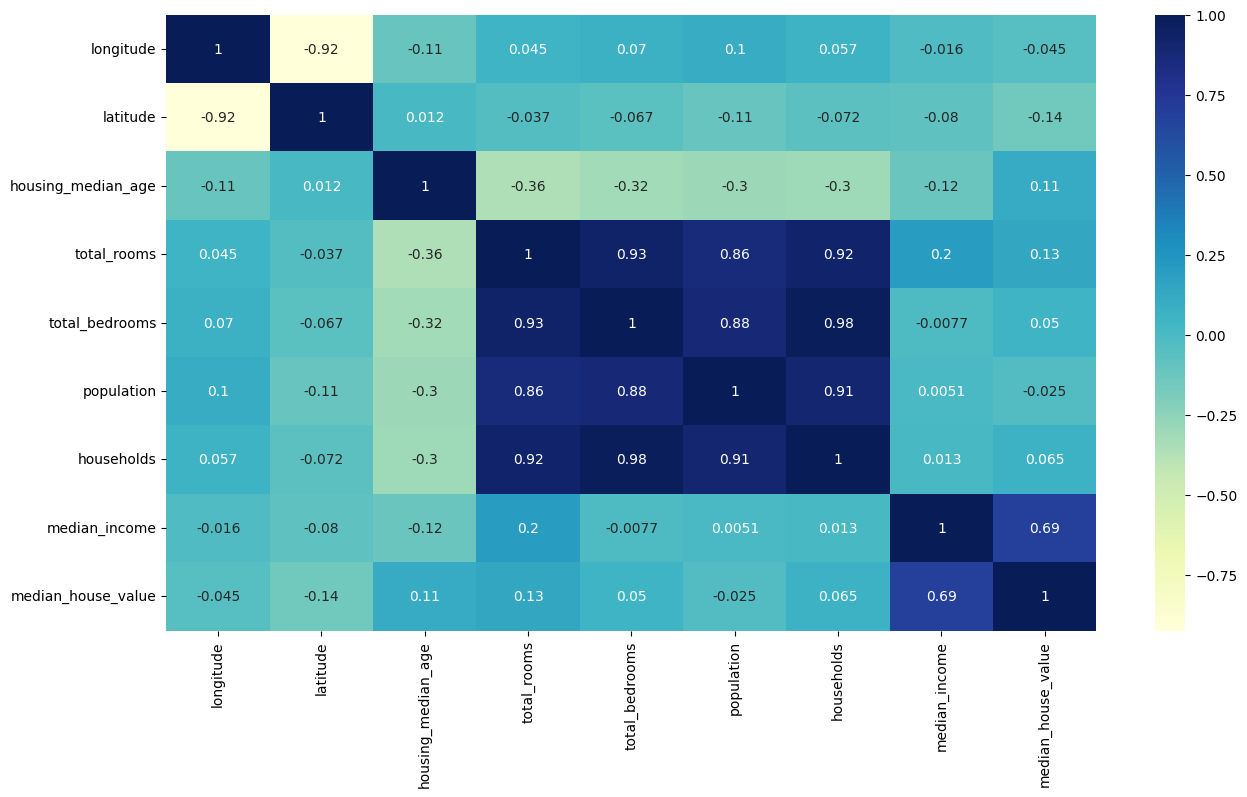

In [49]:
dataset_corr=dataset.drop(["ocean_proximity"],axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(dataset_corr.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Standardization

In [50]:
dataset["total_rooms"]=np.log(dataset["total_rooms"]+1)
dataset["total_bedrooms"]=np.log(dataset["total_bedrooms"]+1)
dataset["population"]=np.log(dataset["population"]+1)
dataset["households"]=np.log(dataset["households"]+1)

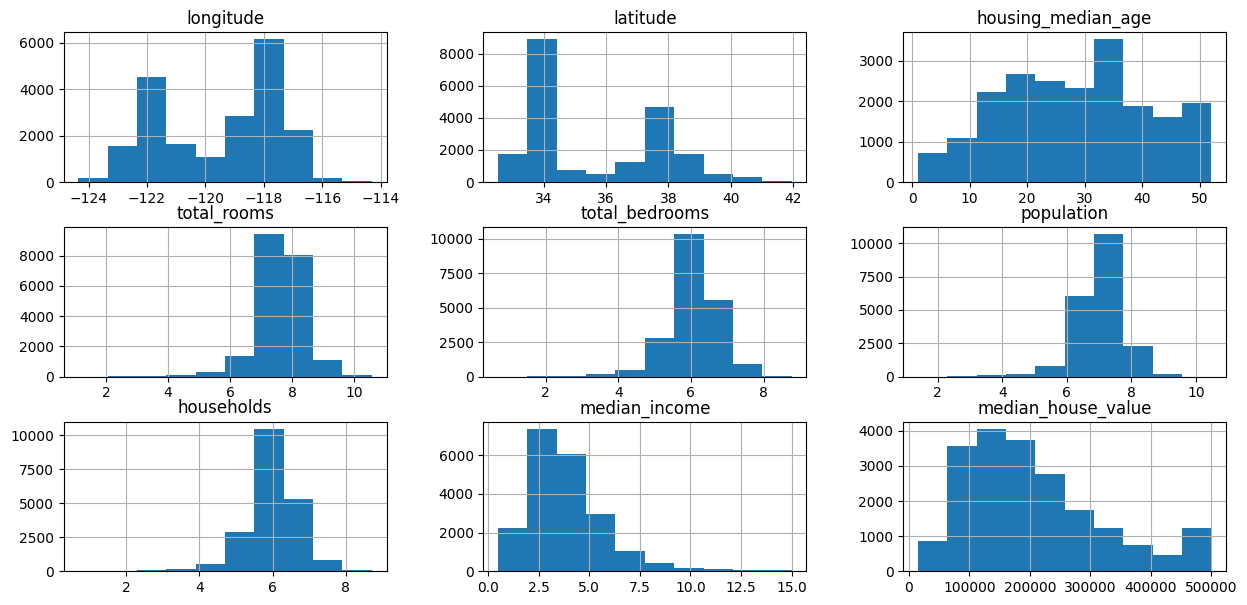

In [51]:
dataset.hist(figsize=(15,7))
plt.show()

### Feature Extraction

In [52]:
dataset=dataset.join(pd.get_dummies(dataset.ocean_proximity,dtype=int)).drop(["ocean_proximity"],axis=1)

<Axes: >

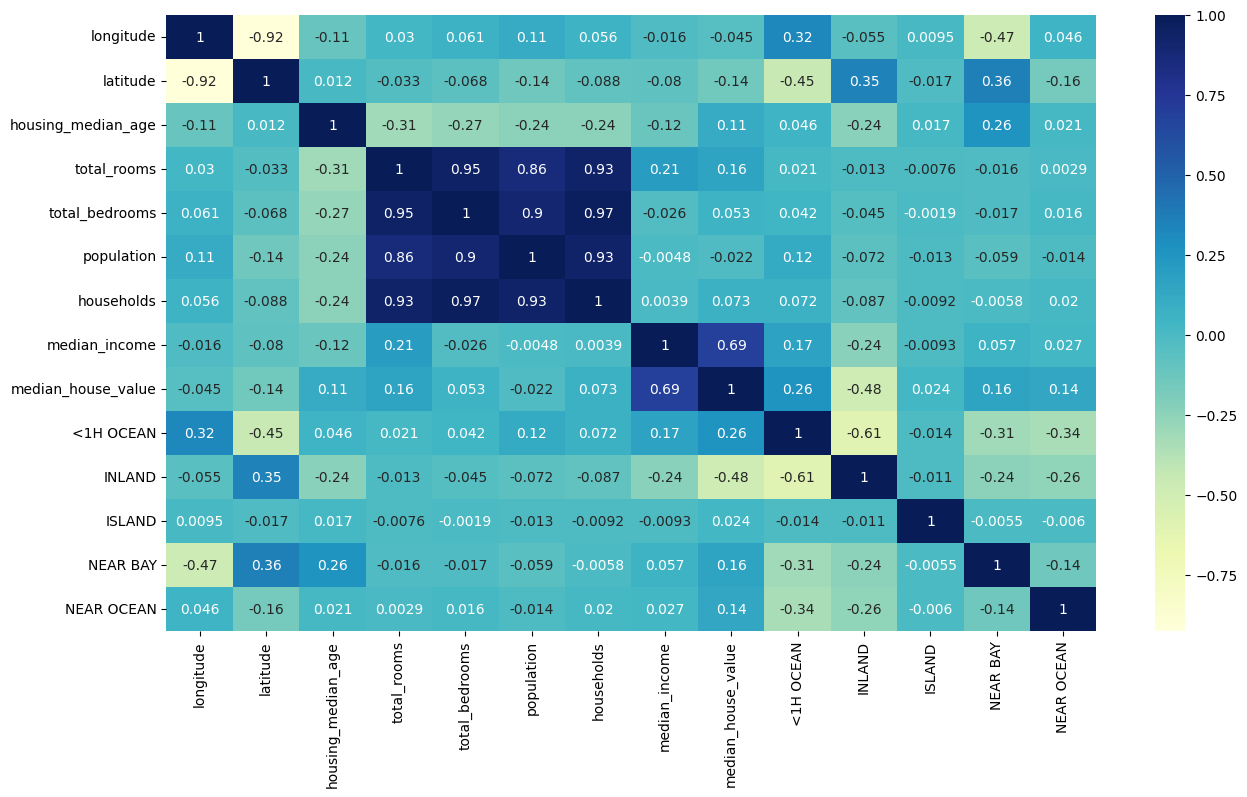

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

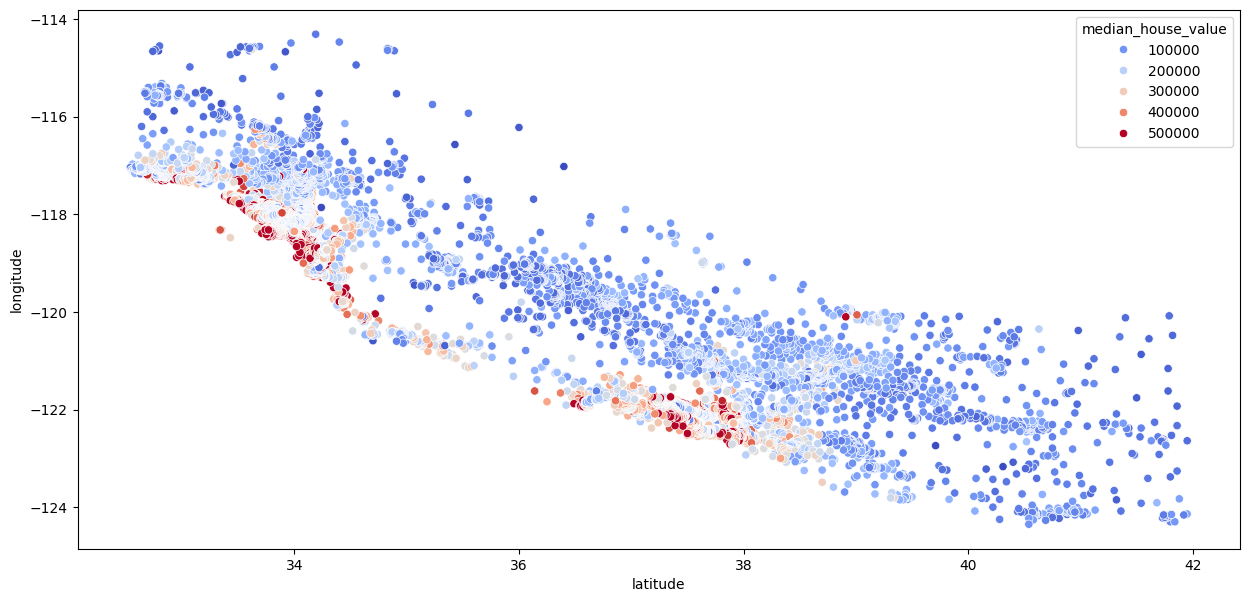

In [54]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="latitude",y="longitude",data=dataset,hue="median_house_value",palette="coolwarm")
plt.show()

In [55]:
dataset["bedroom_ratio"]=dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["household_rooms"]=dataset["total_rooms"]/dataset["households"]

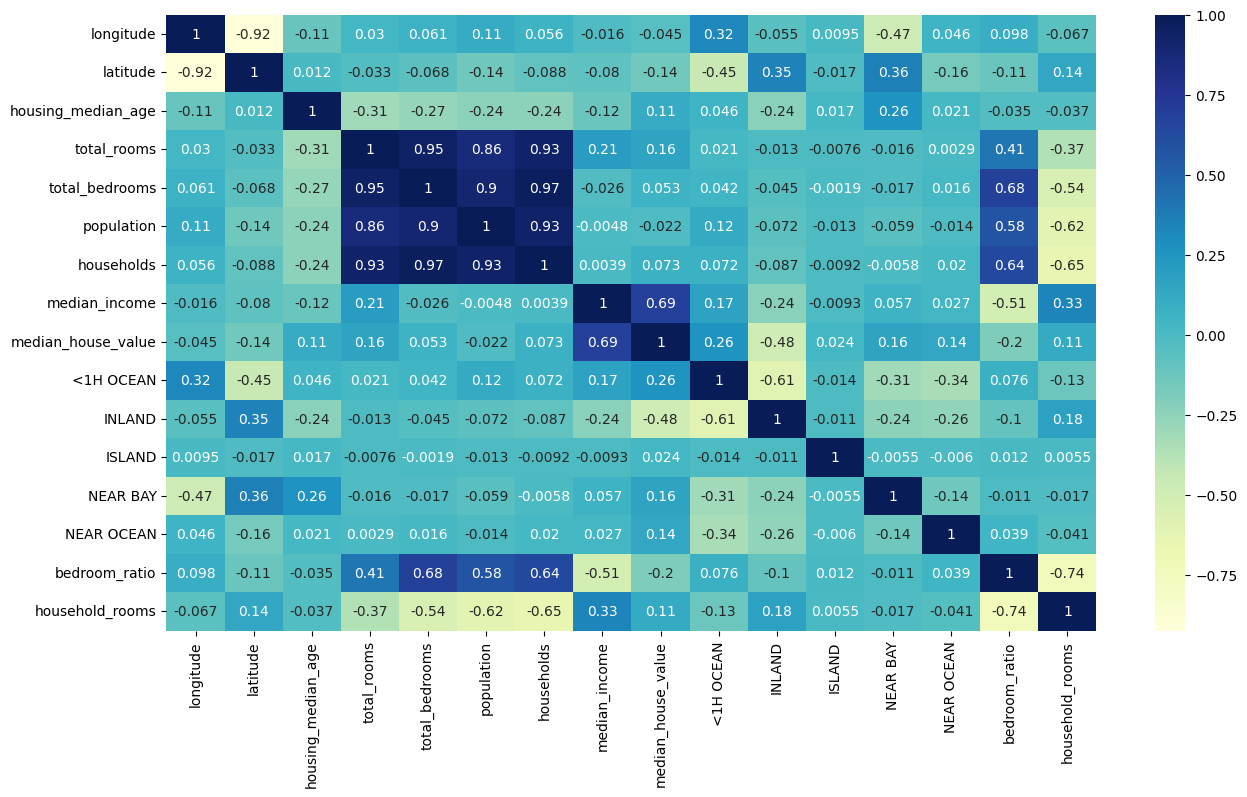

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Traing Our Model -- LinearRegression

In [57]:
x=dataset.drop(["median_house_value"],axis=1)
y=dataset["median_house_value"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
score=reg.score(x_test,y_test)
print(f"Linear Regression Model Accuracy: {score*100:.2f}% ")

Linear Regression Model Accuracy: 65.86% 


### Training Our Model -- RandomForest

In [60]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
score=forest.score(x_test,y_test)
print(f"Random Forest Model Accuracy: {score*100:.2f}% ")

Random Forest Model Accuracy: 81.32% 
